<a href="https://colab.research.google.com/github/Reniindriyani135/UTS_Datmin/blob/main/UTS_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAMA : Reni Indriyani
# NIM  : 4101422135

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

# 1. Ekplorasi awal

1a.Berapa jumlah total penumpang dalam data?

In [ ]:
total_passengers = len(df)
print(f"Jumlah total penumpang: {total_passengers}")

Jumlah total penumpang: 891


1b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.

In [ ]:
survival_counts = df['Survived'].value_counts()
print("\nJumlah penumpang yang selamat dan tidak selamat:")
print(survival_counts)


Jumlah penumpang yang selamat dan tidak selamat:
Survived
0    549
1    342
Name: count, dtype: int64


<ipython-input-9-6dfbd57d5c4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


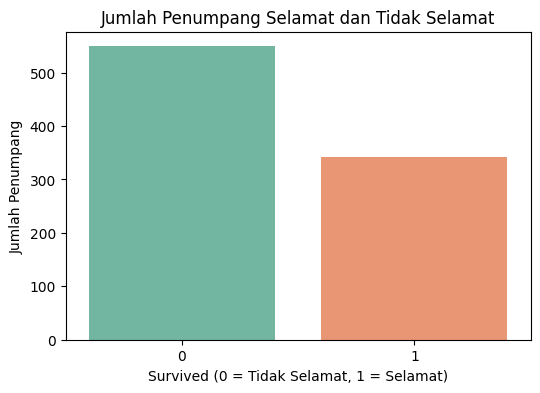

In [ ]:
# Tampilkan dalam bentuk grafik
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xlabel('Survived (0 = Tidak Selamat, 1 = Selamat)')
plt.ylabel('Jumlah Penumpang')
plt.show()

1c.	Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [ ]:
average_age = df['Age'].mean()
youngest_passenger = df.loc[df['Age'].idxmin()]
oldest_passenger = df.loc[df['Age'].idxmax()]

print(f"\nRata-rata umur penumpang: {average_age:.2f} tahun")
print("\nPenumpang termuda:")
print(youngest_passenger)
print("\nPenumpang tertua:")
print(oldest_passenger)


Rata-rata umur penumpang: 29.70 tahun

Penumpang termuda:
PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

Penumpang tertua:
PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                

1d.	Berapa jumlah penumpang berdasarkan jenis kelamin ? Siapa yang lebih banyak? Visualisasikan

In [ ]:
gender_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


<ipython-input-16-84e8b86da198>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


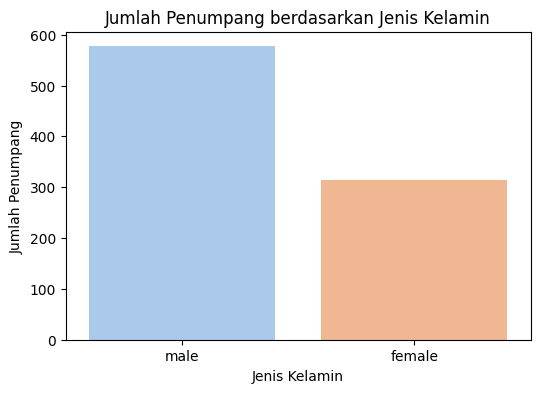

In [ ]:
# Visualisasi jenis kelamin
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

1e.	Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [ ]:
pclass_counts = df['Pclass'].value_counts()
pclass_percentage = (pclass_counts[1] / total_passengers) * 100

print("\nJumlah penumpang berdasarkan kelas:")
print(pclass_counts)
print(f"\nPersentase penumpang di kelas 1: {pclass_percentage:.2f}%")


Jumlah penumpang berdasarkan kelas:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Persentase penumpang di kelas 1: 24.24%


<ipython-input-14-f72ae5bd84c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='coolwarm')


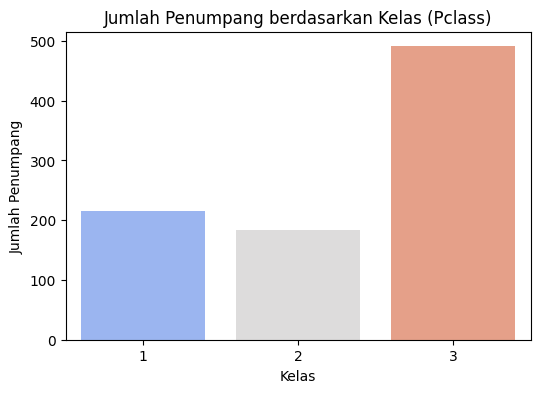

In [ ]:
# Visualisasi kelas penumpang
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', palette='coolwarm')
plt.title('Jumlah Penumpang berdasarkan Kelas (Pclass)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.show()

# 2. Prepocessing

2a.	Apakah terdapat missing value pada data tersebut?

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah missing values tiap kolom:")
print(missing_values)

Jumlah missing values tiap kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


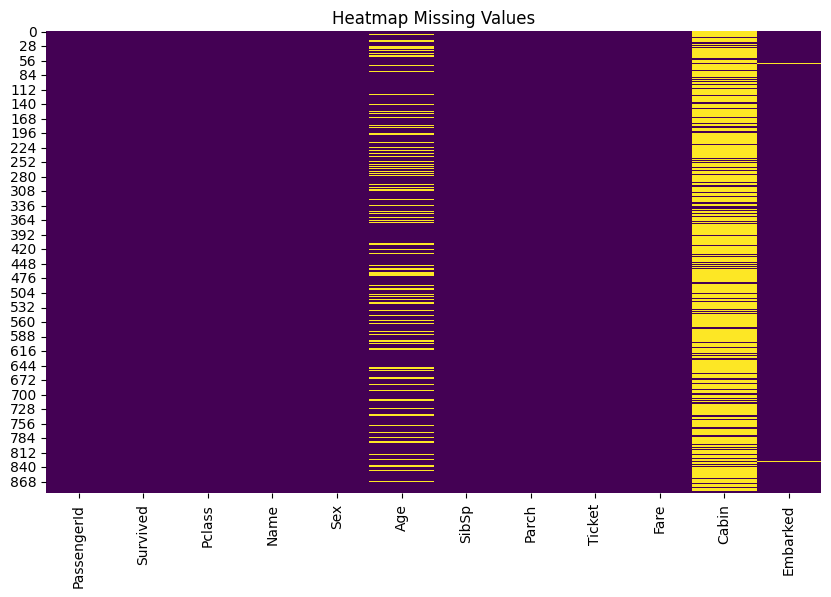

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

2b.	Jika ya, apa yang anda lakukan?

# Strategi:
- Kolom 'Age' ada missing value => isi dengan median
- Kolom 'Cabin' banyak missing value => drop kolom ini
- Kolom 'Embarked' ada sedikit missing => isi dengan modus (most frequent)

In [ ]:
# Mengatasi missing value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Drop kolom Cabin

print("\nMissing values setelah diatasi:")
print(df.isnull().sum())


Missing values setelah diatasi:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-20-a50cdadf3cca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-20-a50cdadf3cca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

2c.	Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!

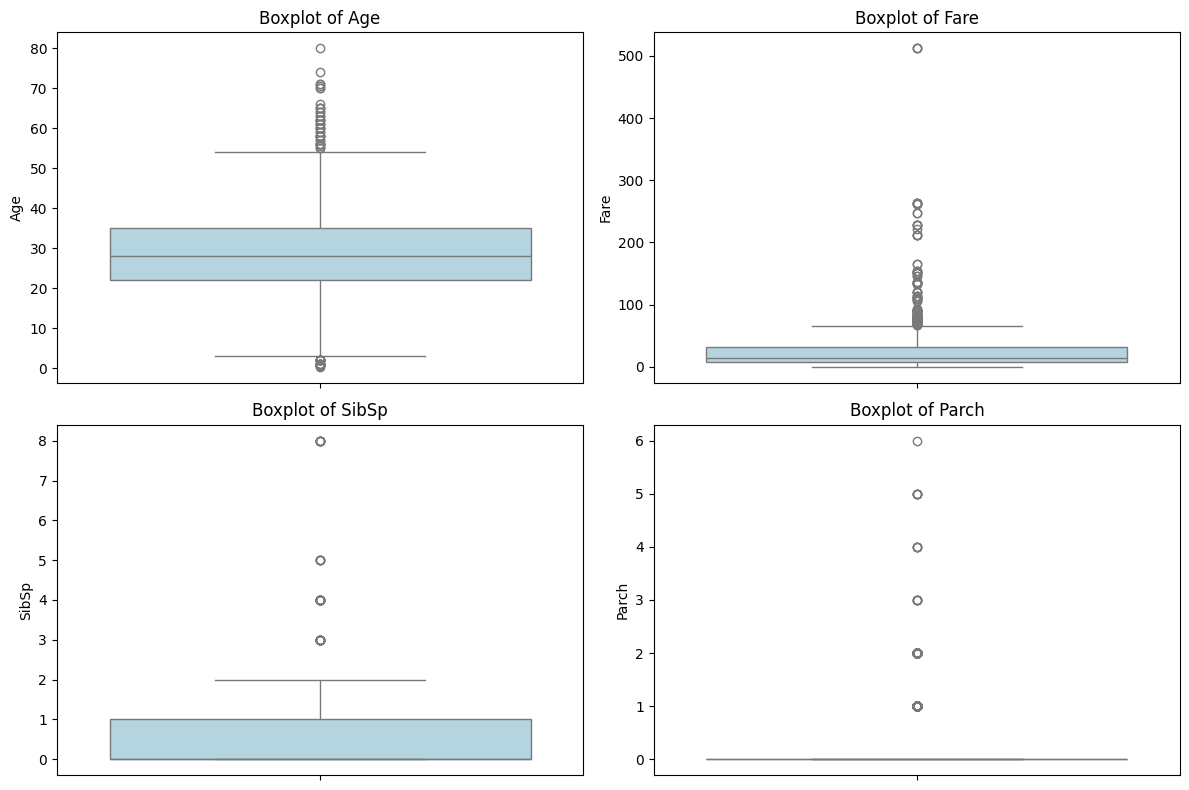

 Outlier adalah nilai ekstrem yang berbeda jauh dari sebagian besar data lainnya.
Bisa dilihat dari boxplot, biasanya titik-titik yang jauh dari kotak (whisker) disebut outlier.



In [ ]:
# Kita cek menggunakan boxplot untuk kolom numerik
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
print(""" Outlier adalah nilai ekstrem yang berbeda jauh dari sebagian besar data lainnya.
Bisa dilihat dari boxplot, biasanya titik-titik yang jauh dari kotak (whisker) disebut outlier.
""")

2d.	Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Outlier bisa mempengaruhi model, terutama model berbasis regresi/statistik.
Jika jumlah outlier kecil dan masuk akal (contoh harga tiket mahal), mungkin tidak perlu dihapus.
Namun jika data outlier tidak wajar, bisa dipertimbangkan untuk diatasi.

In [ ]:
# Cara sederhana mengatasi outlier misal dengan capping (menggunakan IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [ ]:
# Terapkan untuk kolom Age dan Fare (yang terlihat ada outlier)
remove_outliers(df, 'Age')
remove_outliers(df, 'Fare')

2e.	Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("\nContoh data setelah scaling:")
print(df_scaled[numerical_cols].head())


Contoh data setelah scaling:
        Age      Fare     SibSp     Parch
0 -0.583432 -0.820552  0.432793 -0.473674
1  0.742685  2.031623  0.432793 -0.473674
2 -0.251903 -0.787578 -0.474545 -0.473674
3  0.494038  1.419297  0.432793 -0.473674
4  0.494038 -0.781471 -0.474545 -0.473674


# 3. Modeling

In [ ]:
import pandas as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-39-56d4c04122ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-39-56d4c04122ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
# Fitur (X) dan Target (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

3a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.
 Pembagian Data: Train dan Tess

3b.	Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?
Persentase: 80% train, 20% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 712
Jumlah data testing: 179


Penjelasan:
Kita perlu membagi supaya model bisa belajar dari sebagian data (train)
dan diuji kemampuannya pada data baru (test) untuk menghindari overfitting.

3c. Model Klasifikasi dari 3 Algoritma

In [ ]:
# 1. Logistic Regression
model_logreg = LogisticRegression(max_iter=200)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# 2. Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 3. Random Forest
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Penjelasan:
- Logistic Regression: Model linear untuk klasifikasi. Menghitung probabilitas.
- Decision Tree: Membuat pohon keputusan berdasarkan fitur.
- Random Forest: Gabungan banyak decision tree (ensemble) untuk meningkatkan akurasi.

3d.	Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?

In [ ]:
models = {
    'Logistic Regression': model_logreg,
    'Decision Tree': model_tree,
    'Random Forest': model_forest
}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Akurasi: {acc:.4f}")
    print(f"Presisi: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Akurasi: 0.8101
Presisi: 0.7857
Recall: 0.7432
F1 Score: 0.7639

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Model: Decision Tree
Akurasi: 0.7821
Presisi: 0.7215
Recall: 0.7703
F1 Score: 0.7451

Confusion Matrix:
[[83 22]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179


Model: Random Forest
Akurasi: 0.8212
Presis

3e. Bandingkan Hasil

Penjelasan Metrik:
- Akurasi: Proporsi prediksi yang benar.
- Presisi: Seberapa tepat model memprediksi positif.
- Recall: Seberapa baik model menemukan semua positif.
- F1 Score: Harmoni antara presisi dan recall.

Model Random Forest biasanya paling baik karena:
- Mengurangi overfitting.
- Lebih stabil karena voting dari banyak pohon.
""")

#4. Evaluasi

In [49]:
# Prediksi menggunakan model terbaik (Random Forest)
y_pred_forest = model_forest.predict(X_test)

4a.	Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?

In [50]:
report = classification_report(y_test, y_pred_forest, output_dict=True)
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_forest))


Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [51]:
# Nilai precision dan recall untuk prediksi penumpang yang "selamat" (class = 1)
precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision untuk 'selamat' (class=1): {precision_selamat:.4f}")
print(f"Recall untuk 'selamat' (class=1): {recall_selamat:.4f}")

Precision untuk 'selamat' (class=1): 0.8088
Recall untuk 'selamat' (class=1): 0.7432


4b.	Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [52]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[92 13]
 [19 55]]


In [53]:
# Struktur confusion matrix:
# [[True Negative (TN)  False Positive (FP)]
#  [False Negative (FN) True Positive (TP)]]

In [55]:
# Untuk class "1" (selamat):
true_positive = cm[1,1]  # Prediksi selamat dan benar selamat
predicted_selamat = cm[0,1] + cm[1,1]  # Semua yang diprediksi selamat (baik benar maupun salah)

print(f"Jumlah penumpang yang diprediksi 'selamat': {predicted_selamat}")
print(f"Jumlah yang benar-benar 'selamat': {true_positive}")

Jumlah penumpang yang diprediksi 'selamat': 68
Jumlah yang benar-benar 'selamat': 55
